<a href="https://colab.research.google.com/github/fedhere/MLTSA22_FBianco/blob/main/KNN/KNN_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

--2023-04-04 11:13:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [application/x-httpd-php]
Saving to: ‘wine.data’

wine.data           100%[===================>]  10.53K  --.-KB/s    in 0s      

2023-04-04 11:13:56 (161 MB/s) - ‘wine.data’ saved [10782/10782]



In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names

--2023-04-04 11:10:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3036 (3.0K) [application/x-httpd-php]
Saving to: ‘wine.names’

wine.names          100%[===================>]   2.96K  --.-KB/s    in 0s      

2023-04-04 11:10:19 (145 MB/s) - ‘wine.names’ saved [3036/3036]



In [3]:
import pandas as pd

In [10]:
wines = pd.read_csv("wine.data", header=None)
wines

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [15]:
columns = {0:"quality",
           1:"Alcohol",2:"Malic acid",3:"Ash",4:"Alcalinity of ash",5:"Magnesium",
	        6:"Total phenols",7:"Flavanoids",8:"Nonflavanoid phenols",9:"Proanthocyanins",
          10:"Color intensity",11:"Hue",12:"OD280/OD315 of diluted wines",13:"Proline"}

wines.rename(columns=columns, inplace=True)
wines

,quality,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [16]:
from sklearn import preprocessing

In [18]:
X = preprocessing.scale(wines.iloc[:,1:])

In [20]:
X.mean(axis=0).shape

(13,)

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, wines["quality"], random_state=302)

In [194]:
import sklearn.neighbors as nb

In [195]:
clf = nb.KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [196]:
pred = clf.predict(X_test)
pred

array([2, 3, 2, 3, 2, 3, 3, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 3, 3, 1, 1,
       2, 3, 2, 1, 2, 1, 1, 3, 3, 1, 1, 3, 3, 3, 2, 1, 1, 2, 1, 1, 2, 3,
       3])

In [211]:
y_score = clf.predict_proba(X_test)
y_score

array([[0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.6, 0.4],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.4, 0.6, 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.2, 0.8, 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0.2, 0.8, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0.6, 0.4, 0. ],
       [1. , 0. 

In [204]:
import sklearn.manifold as man
tsne_wines = man.TSNE(n_components=2, perplexity=30.0, early_exaggeration=90.0,
                      random_state=302).fit(X)
wine_proj = tsne_wines.fit_transform(X)
wine_proj_test = tsne_wines.fit_transform(X_test)

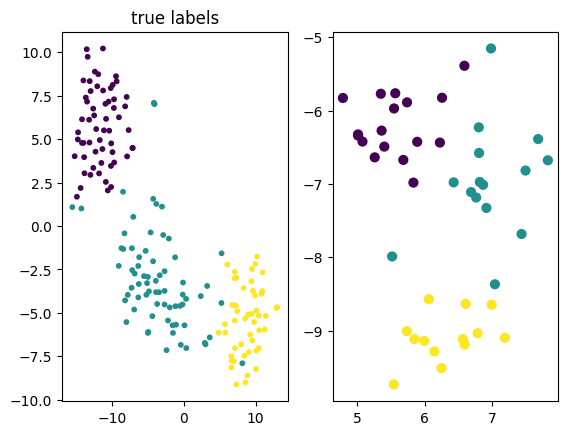

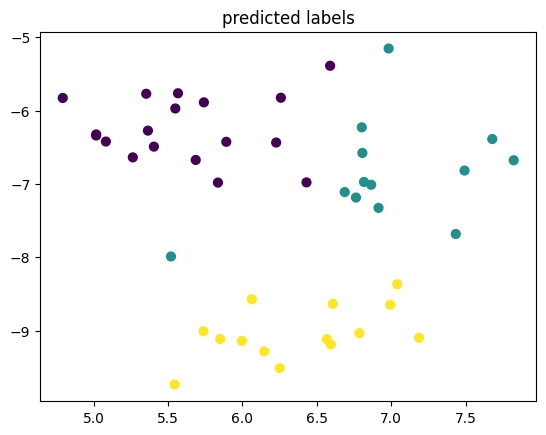

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

_, ax = plt.subplots(1,2)

ax[0].scatter(wine_proj.T[0], wine_proj.T[1], s=10, c = wines["quality"]/3);
ax[1].scatter(wine_proj_test.T[0], wine_proj_test.T[1], s=40, c = y_test/3);
ax[0].set_title("true labels")

_, ax = plt.subplots(1)

ax.scatter(wine_proj_test.T[0], wine_proj_test.T[1], s=40, c = pred/3);
ax.set_title("predicted labels");


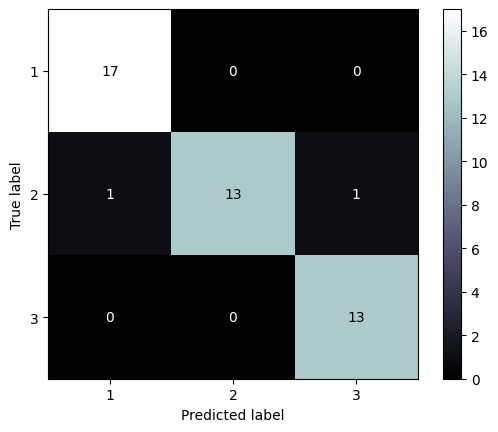

In [217]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred);
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap="bone")

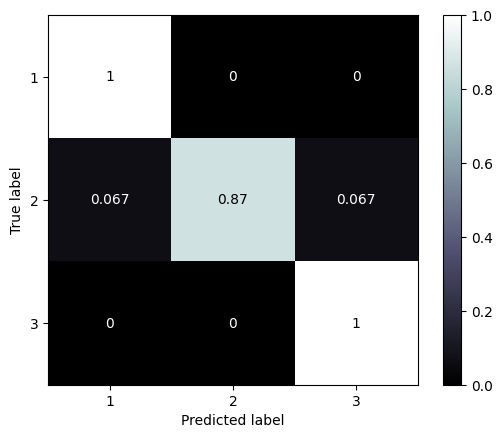

In [218]:
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap="bone", normalize="true")

In [225]:
y_pred

array([2, 3, 2, 3, 2, 3, 3, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 3, 3, 1, 1,
       2, 3, 2, 1, 2, 1, 1, 3, 3, 1, 1, 3, 3, 3, 2, 1, 1, 2, 1, 1, 2, 3,
       3])

In [233]:
from sklearn import metrics

precision, recall = metrics.precision_score(y_test, pred, average='macro'), \
                    metrics.recall_score(y_test, pred, average='macro')


precision, recall

(0.9576719576719577, 0.9555555555555556)

In [237]:
from sklearn.metrics import RocCurveDisplay
import numpy as np
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_test)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

label_binarizer.transform([0])



array([[0, 0, 0]])

In [238]:
label_binarizer.transform(y_test)

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [239]:

class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
y_score = clf.fit(X, wines["quality"]).predict_proba(X_test)
y_score

array([[0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.6, 0.4],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.4, 0.6, 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.4, 0.6, 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. 

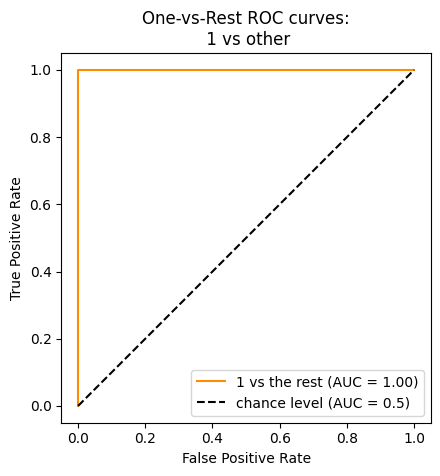

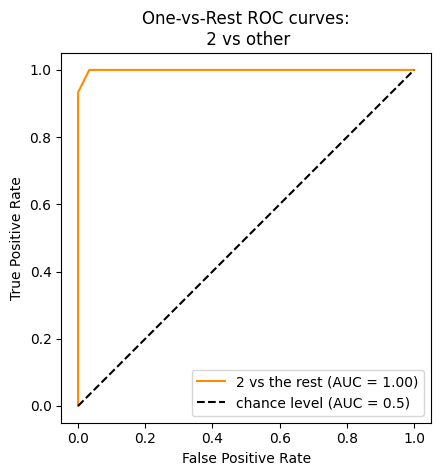

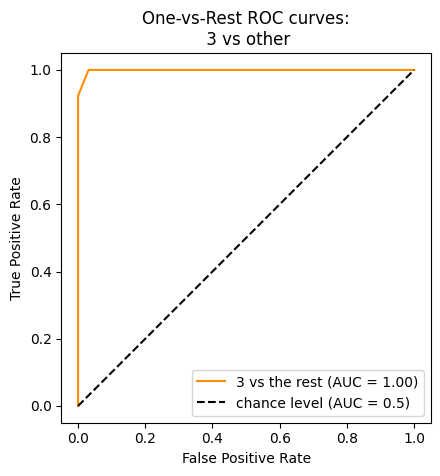

In [240]:
for i in range(1, 4):
  class_of_interest = i
  class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
 

  RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
  )
  plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
  plt.axis("square")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("One-vs-Rest ROC curves:\n {} vs other".format(class_of_interest))
  plt.legend()
  plt.show()


In [241]:
y_score

array([[0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.6, 0.4],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.4, 0.6, 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.4, 0.6, 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. 

In [242]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label=2)
auc = roc_auc_score(label_binarizer.transform(y_test), y_score, multi_class="ovr")
auc

0.9992289886039886